In [1]:
## Import necessary libraries and dataframe
import pandas as pd

data = pd.read_csv("Data\Connections.csv")
data.head(10)

First Name         Last Name  \
0      Wells  Velasquez Maciel   
1    Patrick            Canney   
2      Borja    Martínez Ariza   
3     Krutik          Pednekar   
4     Nathan          Woodward   
5      RIGAN           NGANGOM   
6     Chiara          Celidoni   
7      Daire           O'Neill   
8     Dustin          Aldridge   
9       Rita      Guembes, MCI   

                                                 URL Email Address  \
0  https://www.linkedin.com/in/wells-velasquez-ma...           NaN   
1         https://www.linkedin.com/in/paddyblack-exe           NaN   
2  https://www.linkedin.com/in/borja-mart%C3%ADne...           NaN   
3         https://www.linkedin.com/in/krutikpednekar           NaN   
4  https://www.linkedin.com/in/nathan-woodward-42...           NaN   
5  https://www.linkedin.com/in/rigan-ngangom-17b0...           NaN   
6         https://www.linkedin.com/in/chiaracelidoni           NaN   
7  https://www.linkedin.com/in/daire-o-neill-3584762           NaN   
8  https://www.linkedin.com/in/dustin-aldridge-98...           NaN   
9           https://www.linkedin.com/in/ritaguembesc           NaN   

                          Company  \
0                      SiteMinder   
1                            SOTI   
2                          Abbott   
3              Trane Technologies   
4            Avondata Systems Ltd   
5                      EDoors Inc   
6                      SiteMinder   
7  Irish Life Investment Managers   
8                      SiteMinder   
9                      SiteMinder   

                                          Position Connected On  
0            Customer Solutions Consultant Level 3  11 Sep 2024  
1              Senior Technical Support Specialist  11 Sep 2024  
2   Customer Service - Order Management Specialist  30 Apr 2024  
3                                   Standards Lead  24 Apr 2024  
4                           Client Success Manager  23 Apr 2024  
5                                 Senior Team Lead  21 Feb 2024  
6                       Strategic Account Director  21 Dec 2023  
7  Manager Reporting: Performance Measurement Team  21 Dec 2023  
8                         Premium Services Manager  01 Dec 2023  
9           Customer Onboarding Success Specialist  30 Nov 2023

In [2]:
## Sort data by connection date and visualize
data = data.sort_values(by='Connected On')

import plotly.express as px

fig1 = px.line(data.groupby(by='Connected On').count().reset_index(),
       x = 'Connected On',
       y = 'First Name',
       labels = {'First Name':'No. of Connections'},
       title = 'Connection Timeline')

fig1.show()

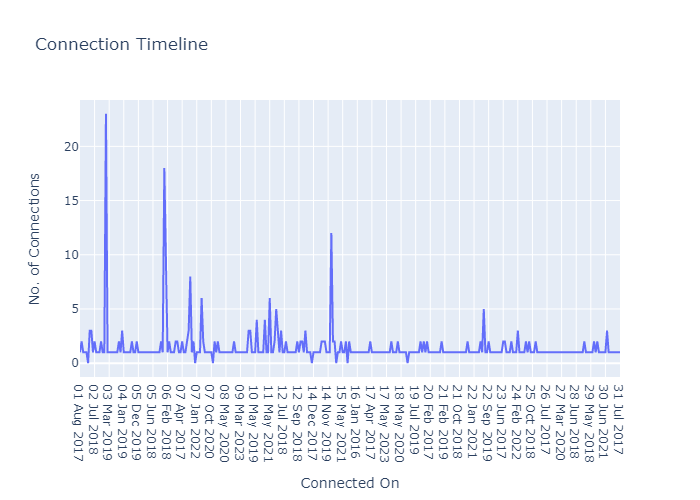

In [3]:
fig1.write_image("Figure1.png")

from IPython.display import Image
Image(filename='Figure1.png')

In [4]:
## Now changing the date format and re-creating visual
data['Connected On'] = pd.to_datetime(data['Connected On'], format='%d %b %Y')

data = data.sort_values(by='Connected On')

grouped_data = data.groupby(by='Connected On').count().reset_index()

## Create the line plot
fig2 = px.line(grouped_data,
              x='Connected On',
              y='First Name',  # Assuming 'First Name' is a column representing connections
              labels={'First Name': 'No. of Connections'},
              title='Connection Timeline')
fig2.show()

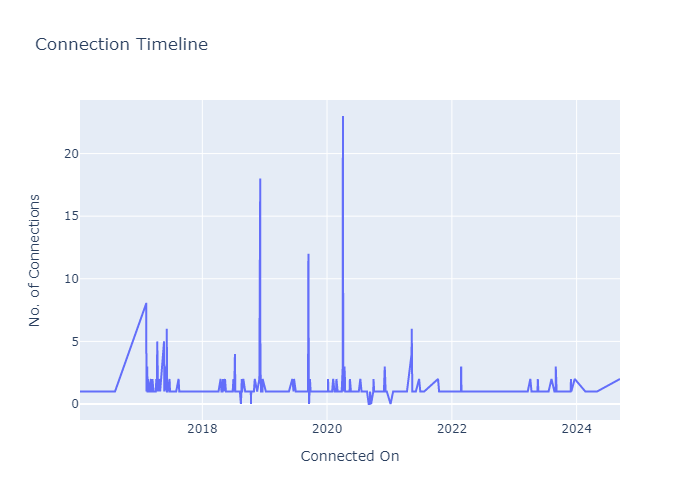

In [5]:
fig2.write_image("Figure2.png")

Image(filename='Figure2.png')

In [6]:
# Create a new column with the year and month
data['YearMonth'] = data['Connected On'].dt.to_period('M')  # Year and Month format YYYY-MM

# Group by the 'YearMonth' column and count the number of connections for each month
monthly_data = data.groupby('YearMonth').size().reset_index(name='ConnectionCount')

# Sort the data by the number of connections in descending order
top_months = monthly_data.sort_values(by='ConnectionCount', ascending=False).head(10)

# Print the top 10 months with the highest number of connections
print(top_months)

   YearMonth  ConnectionCount
39   2020-04               46
2    2017-02               39
23   2018-12               33
32   2019-09               27
6    2017-06               16
4    2017-04               15
52   2021-05               13
18   2018-07               13
5    2017-05               12
36   2020-01               11


In [7]:
## Now view the company column of each connection
data['Company']

496      SAP SuccessFactors
495                  adidas
490               Qualtrics
493         Employment Hero
494                   Cisco
               ...         
4      Avondata Systems Ltd
3        Trane Technologies
2                    Abbott
1                      SOTI
0                SiteMinder
Name: Company, Length: 497, dtype: object

In [8]:
## Group and count the connections by company
group_company = data.groupby(by='Company').count().reset_index()
group_company

Company  First Name  Last Name  URL  Email Address  \
0          7AJ WORLD ENTERTAINMENT           1          1    1              0   
1                       7th Heaven           1          1    1              0   
2                              AIB           1          1    1              0   
3    AIHR | Academy to Innovate HR           1          1    1              0   
4          AKOFENA RENTALS LIMITED           1          1    1              0   
..                             ...         ...        ...  ...            ...   
290                         owl.co           1          1    1              0   
291                  permanent tsb           1          1    1              0   
292       truelink Consulting GmbH           1          1    1              0   
293             www.cestandard.com           1          1    1              0   
294     𝙃𝙖𝙧𝙢𝙤𝙣𝙞𝙘 𝘿𝙞𝙜𝙞𝙩𝙖𝙡 𝙈𝙖𝙧𝙠𝙚𝙩𝙞𝙣𝙜           1          1    1              0   

     Position  Connected On  YearMonth  
0           1             1          1  
1           1             1          1  
2           1             1          1  
3           1             1          1  
4           1             1          1  
..        ...           ...        ...  
290         1             1          1  
291         1             1          1  
292         1             1          1  
293         1             1          1  
294         1             1          1  

[295 rows x 8 columns]

In [9]:
## Sorting the results by number of connections per company
group_company = group_company.sort_values(by='Connected On', ascending=False).reset_index(drop=True)
group_company

Company  First Name  Last Name  URL  Email Address  \
0                    SiteMinder         100        100  100              3   
1                           SAP          38         38   38              0   
2                       Genesys           5          5    5              0   
3                    Salesforce           4          4    4              0   
4                    NUI Galway           4          4    4              0   
..                          ...         ...        ...  ...            ...   
290        GuestCentric Systems           1          1    1              0   
291       HERO Recruitment Ltd.           1          1    1              0   
292                         HID           1          1    1              0   
293        Hayes solicitors LLP           1          1    1              0   
294  𝙃𝙖𝙧𝙢𝙤𝙣𝙞𝙘 𝘿𝙞𝙜𝙞𝙩𝙖𝙡 𝙈𝙖𝙧𝙠𝙚𝙩𝙞𝙣𝙜           1          1    1              0   

     Position  Connected On  YearMonth  
0         100           100        100  
1          38            38         38  
2           5             5          5  
3           4             4          4  
4           4             4          4  
..        ...           ...        ...  
290         1             1          1  
291         1             1          1  
292         1             1          1  
293         1             1          1  
294         1             1          1  

[295 rows x 8 columns]

In [10]:
fig3 = px.bar(group_company[:150],
           x = 'Company',
           y = 'Connected On',
           labels = {'Connected On':'Number of Connections'},
           width = 1000,
           height = 800,
           title = 'Bar graph for companies that my connections work at'
          )
fig3.show()

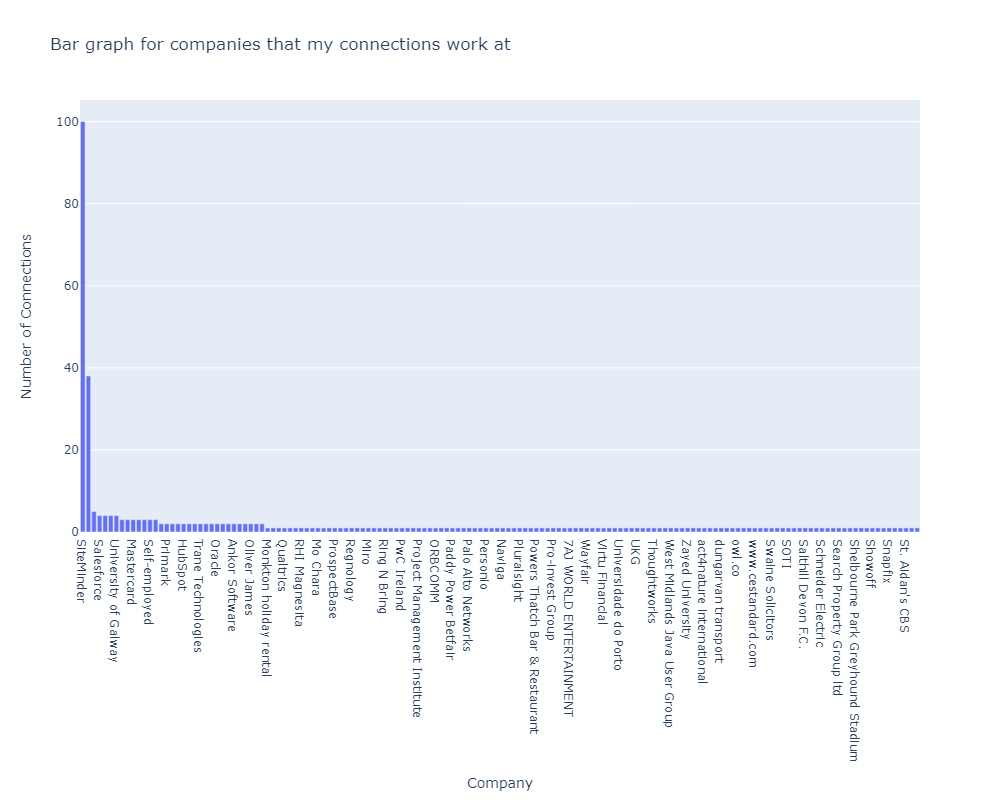

In [11]:
fig3.write_image("Figure3.png")

Image(filename='Figure3.png')

In [12]:
## Creating a treemap visualization with less companies
fig4 = px.treemap(group_company[:100], path = ['Company','Position'],
           values = 'Connected On',
           labels = {'Connected On':'Number of Connections'},
           width = 1000,
           height = 800,
           title = 'Bar graph for companies that my connections work at'
          )
fig4.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



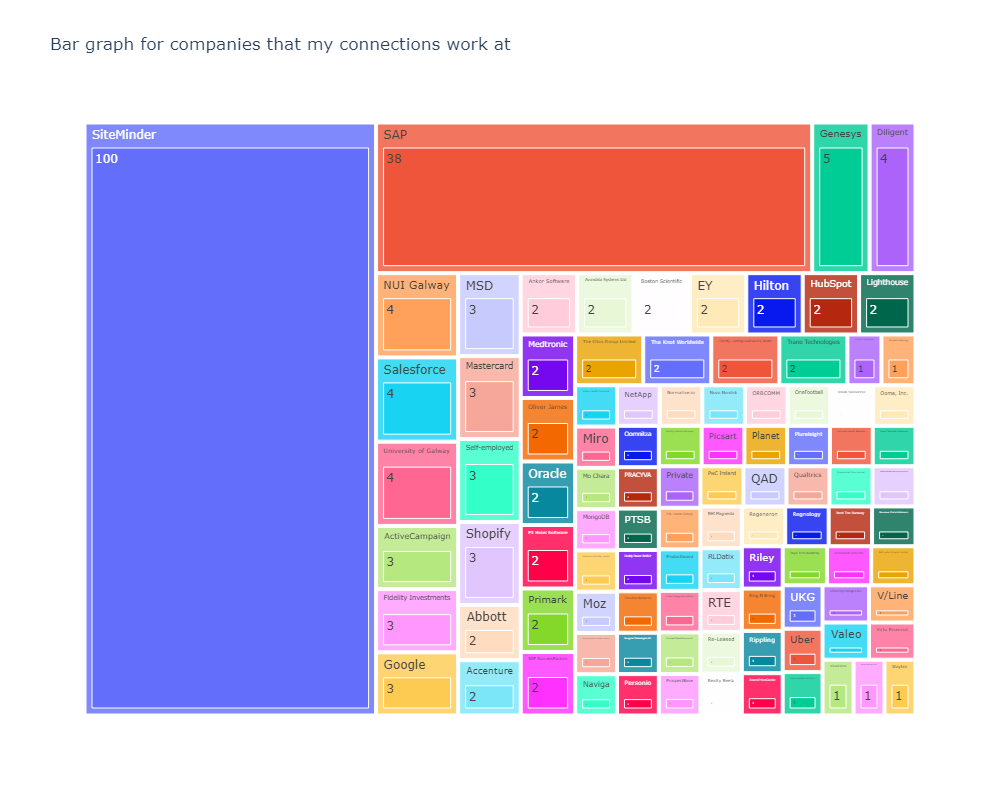

In [13]:
fig4.write_image("Figure4.png")

Image(filename='Figure4.png')

In [14]:
## Finding the positions of each connection
data['Position'].value_counts()

Director                                 5
Manager                                  5
Project Manager                          3
Business Development Manager             3
Account Executive                        3
                                        ..
Partner Integrations Team Leader         1
Developer                                1
L&D Trainer                              1
Software Tester                          1
Customer Solutions Consultant Level 3    1
Name: Position, Length: 442, dtype: int64

In [15]:
## Now only going to show the values above 20%
position_data = data['Position'].value_counts()/len(data)*100 > 0.20

In [16]:
## Get the count of these values
data['Position'].value_counts()[data['Position'].value_counts()/len(data)*100 > 0.20]

Director                                 5
Manager                                  5
Project Manager                          3
Business Development Manager             3
Account Executive                        3
                                        ..
Partner Integrations Team Leader         1
Developer                                1
L&D Trainer                              1
Software Tester                          1
Customer Solutions Consultant Level 3    1
Name: Position, Length: 442, dtype: int64

In [17]:
# Create the bar chart
fig5 = px.bar(data.groupby('Position').size().reset_index(name='Count').sort_values(by='Count', ascending=False),
             x='Position',
             y='Count',  
             labels={'Number of Connections': 'Position'},
             width=1000,
             height=900,
             title='The various positions held by my LinkedIn connections'
            )

# Show the plot
fig5.show()

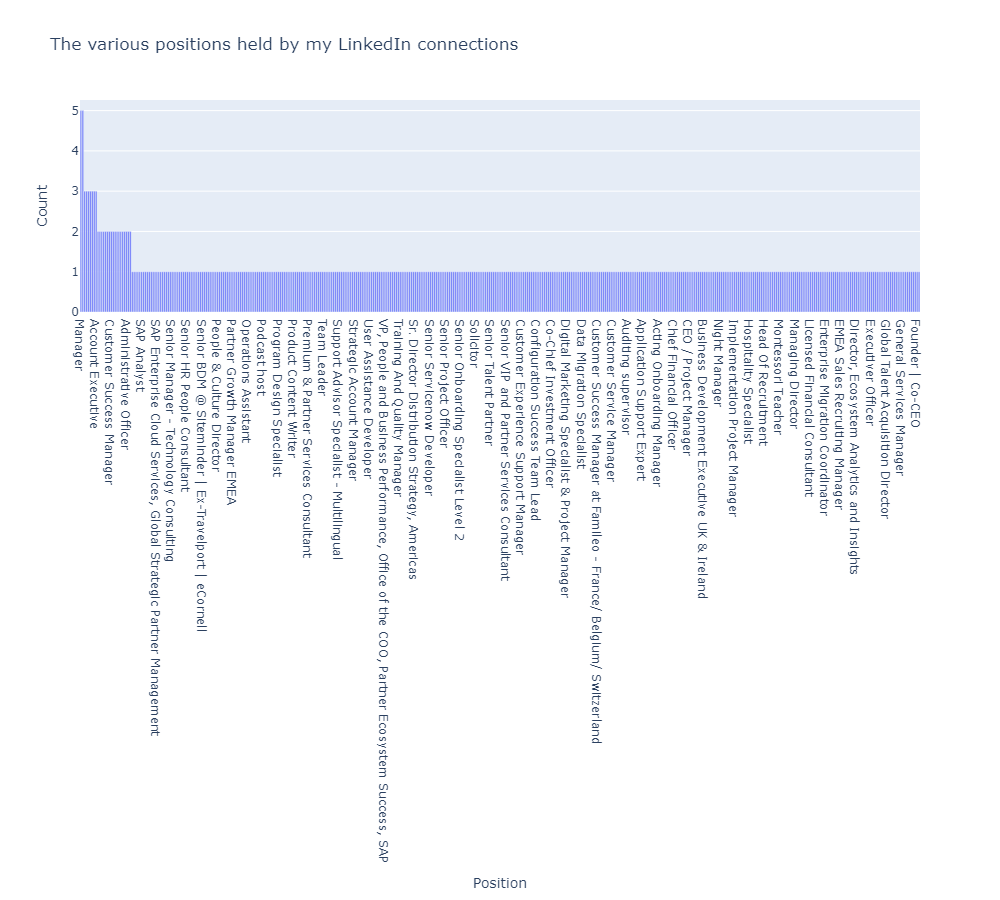

In [18]:
fig5.write_image("Figure5.png")

Image(filename='Figure5.png')

In [19]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


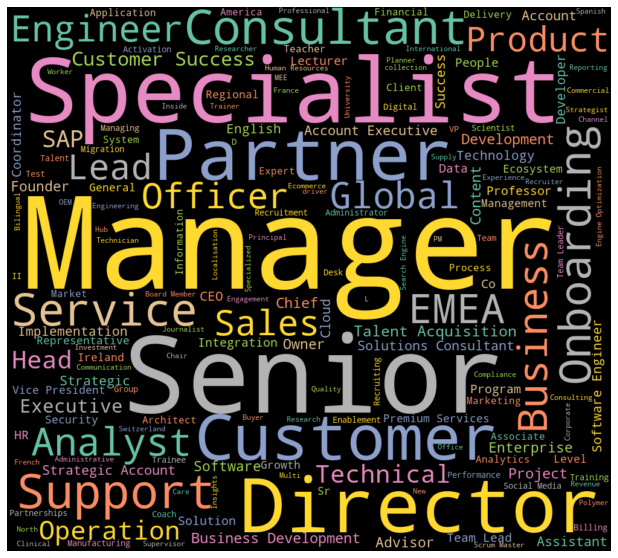

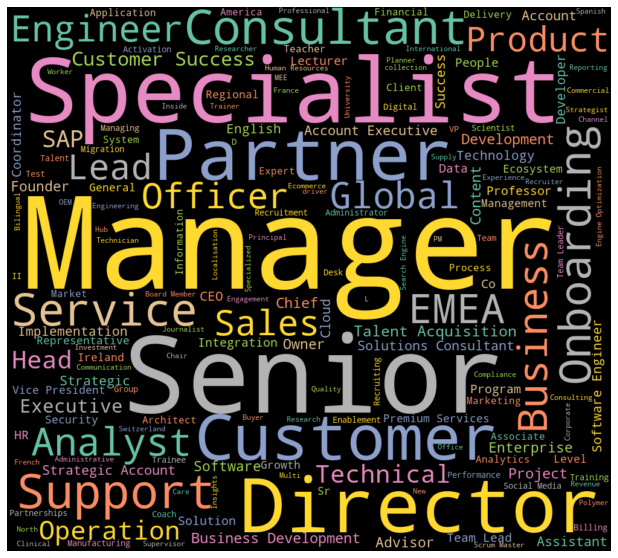

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def CreateWordCloud(text, filename="wordcloud.png"):
    wordcloud = WordCloud(width=1000, height=900,
                          background_color='black',
                          min_font_size=10,
                          colormap='Set2').generate(text)
    
    fig = plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    fig.savefig(filename, format='png', bbox_inches='tight')  # Save figure as image
    
    plt.show()
    return fig

# Convert Position data to a string
positions_text = ' '.join(data['Position'].dropna().astype(str))

CreateWordCloud(positions_text, filename="PositionWordCloud.png")